In [17]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [18]:
beer = pd.read_csv('../1_extract/Resources/beer_reviews.csv')
display(beer[:1].head())

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986


In [19]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [20]:
# Which brewry produces the strongest beers by ABV%? (the mean of ABV for each brewry has beed considered due to the lenght of dataset)
data = beer.groupby('brewery_name').beer_abv.mean()
strong = pd.DataFrame(data.reset_index())

strong.columns = ['brewery_name', 'beer_abv_mean']

strongest = strong[strong.beer_abv_mean == strong.beer_abv_mean.max()]
strongest

,brewery_name,beer_abv_mean
4667,Schorschbräu,19.228824


In [21]:
strong1 = beer[beer.beer_abv == beer.beer_abv.max()]

In [22]:
strong1[['brewery_name','beer_abv', 'beer_beerid']]

,brewery_name,beer_abv,beer_beerid
12919,Schorschbräu,57.7,73368


In [23]:
beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [24]:
# If asked pick the Top 3 beer consider following factors:
# 1)review_overall, 
# 2) review_aroma, 
# 3) review_appearance 
# 4) review_palate, 
# 5) review_taste
# 6) beer_abv

reviews = beer.groupby('beer_beerid').agg({'review_overall': np.mean,
                                'review_aroma': np.mean,
                                'review_appearance': np.mean,
                                'review_palate': np.mean,     
                                'review_taste': np.mean,
                                'beer_abv': np.mean})

picks = pd.DataFrame(reviews.reset_index())

finaltop = picks.sort_values(['review_overall', 'review_aroma','review_appearance','review_palate','review_taste','beer_abv'], ascending=[False,False, False, False, False, False])
finaltop[:3]

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
46212,55451,5.0,5.0,5.0,5.0,5.0,13.0
64816,75956,5.0,5.0,5.0,5.0,5.0,11.0
40090,48325,5.0,5.0,5.0,5.0,5.0,10.5


In [25]:
# If asked Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer


factors = beer[['review_overall','review_aroma','review_taste','review_appearance','review_palate']]
factors.head()

,review_overall,review_aroma,review_taste,review_appearance,review_palate
0,1.5,2.0,1.5,2.5,1.5
1,3.0,2.5,3.0,3.0,3.0
2,3.0,2.5,3.0,3.0,3.0
3,3.0,3.0,3.0,3.5,2.5
4,4.0,4.5,4.5,4.0,4.0


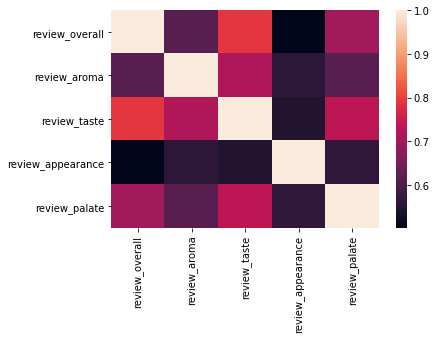

,review_overall,review_aroma,review_taste,review_appearance,review_palate
review_overall,1.000000,0.616013,0.789816,0.501732,0.701914
review_aroma,0.616013,1.000000,0.716776,0.561029,0.616947
review_taste,0.789816,0.716776,1.000000,0.546980,0.734135
review_appearance,0.501732,0.561029,0.546980,1.000000,0.566634
review_palate,0.701914,0.616947,0.734135,0.566634,1.000000


In [26]:
corr = factors.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

display(factors.corr())

In [27]:
# If asked assume someone enjoy a beer due to its aroma and appearance, which beer style should we recommend them?

enjoy = beer[['review_aroma','review_appearance','beer_style']]
enjoy.head()

,review_aroma,review_appearance,beer_style
0,2.0,2.5,Hefeweizen
1,2.5,3.0,English Strong Ale
2,2.5,3.0,Foreign / Export Stout
3,3.0,3.5,German Pilsener
4,4.5,4.0,American Double / Imperial IPA


In [28]:
enjoy_beer1 = enjoy.groupby('beer_style').agg({'review_aroma': np.mean,
                                'review_appearance': np.mean})
enjoy_beer1 = pd.DataFrame(enjoy_beer1.reset_index())
enjoy_beer1.columns = ['beer_style','review_aroma_mean','review_appearance_mean']



enjoy_beer2 = enjoy.groupby('beer_style').agg({'review_aroma': np.max,
                                             'review_appearance': np.max})
enjoy_beer2 = pd.DataFrame(enjoy_beer2.reset_index())
enjoy_beer2.columns = ['beer_style','review_aroma_max','review_appearance_max']


enjoy_beer3 = enjoy.groupby('beer_style').agg({'review_aroma': np.size,
                                             'review_appearance': np.size})
enjoy_beer3 = pd.DataFrame(enjoy_beer3.reset_index())
enjoy_beer3.columns = ['beer_style','review_aroma_count','review_appearance_count']


enjoy_beer = pd.merge(pd.merge(enjoy_beer2, enjoy_beer1, on='beer_style'),enjoy_beer3, on='beer_style')
enjoy_beer.head()

,beer_style,review_aroma_max,review_appearance_max,review_aroma_mean,review_appearance_mean,review_aroma_count,review_appearance_count
0,Altbier,5.0,5.0,3.624015,3.809327,7741.0,7741.0
1,American Adjunct Lager,5.0,5.0,2.480211,2.788546,30749.0,30749.0
2,American Amber / Red Ale,5.0,5.0,3.627254,3.810190,45751.0,45751.0
3,American Amber / Red Lager,5.0,5.0,3.213296,3.527494,9311.0,9311.0
4,American Barleywine,5.0,5.0,4.019343,4.036535,26728.0,26728.0


In [29]:
#Tope 5 recomended beers list:
recomd = enjoy_beer.sort_values(['review_aroma_count','review_appearance_count','review_aroma_mean', 'review_appearance_mean','review_aroma_max','review_appearance_max'], ascending=[False, False,False, False, False, False])
top = recomd[:5]['beer_style']
top

12                        American IPA
9       American Double / Imperial IPA
14             American Pale Ale (APA)
89              Russian Imperial Stout
11    American Double / Imperial Stout
Name: beer_style, dtype: object